In [21]:
import numpy as np
import pandas as pd
from scipy import signal
import data_processing as dp
import imp
imp.reload(data_processing)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pywt
import h5py
from nitime.algorithms import autoregressive

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        depth = len(dirname.split(os.path.sep))
        if depth == 2:
            print(os.path.join(dirname,filename))

.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv


In [3]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
emg_data2 = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_2_emg.csv')

In [4]:
emg_data.head()

,Time,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
0,0.000,0,0,-3,2,-4.0,-1.0,0.0,2.0,1.0,-2.0
1,0.001,0,0,-5,10,0.0,-2.0,-4.0,0.0,-7.0,-2.0
2,0.002,0,0,-6,11,1.0,0.0,-4.0,-1.0,-2.0,-3.0
3,0.003,0,0,0,-2,0.0,-3.0,-6.0,-2.0,-5.0,-8.0
4,0.004,0,0,0,-8,-3.0,-3.0,-4.0,-3.0,0.0,2.0


In [5]:
emg_data2.head()

,Time,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
0,0.000,0,0,-14,-4,-4,-1,-9,-2,1.0,-1.0
1,0.001,0,0,-5,-4,-4,-4,-6,-1,0.0,6.0
2,0.002,0,0,6,0,-9,4,-6,-6,0.0,-2.0
3,0.003,0,0,28,1,-1,-1,1,2,-5.0,2.0
4,0.004,0,0,43,3,-2,0,1,2,3.0,1.0


In [6]:
emg_data.Label2.value_counts()

2    39366
0    25373
1     7808
3     4922
4     2362
Name: Label2, dtype: int64

In [7]:
emg_data = emg_data.fillna({'LEFT_BF':emg_data.LEFT_BF.mean(),
                           'LEFT_RF':emg_data.LEFT_RF.mean(),
                           'RIGHT_TA':emg_data.RIGHT_TA.mean(),
                           'RIGHT_TS':emg_data.RIGHT_TS.mean(),
                           'RIGHT_BF':emg_data.RIGHT_BF.mean(),
                           'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

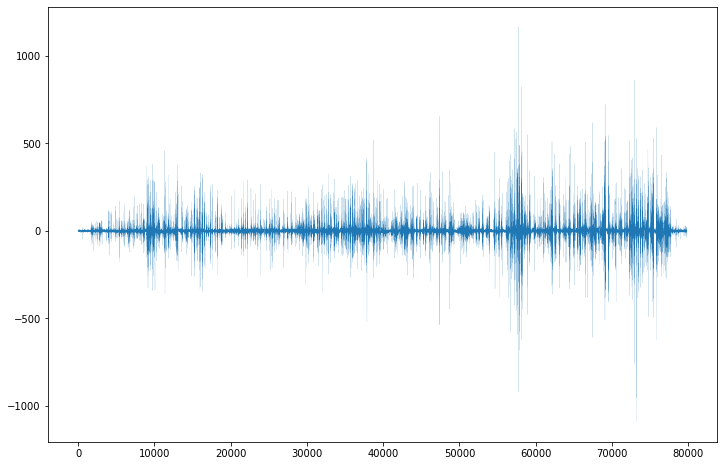

In [8]:
emg_data.RIGHT_TS.plot(linewidth=0.1,figsize=(12,8))

In [9]:
emg_data.isna()

,Time,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
79826,False,False,False,False,False,True,True,False,False,False,False
79827,False,False,False,False,False,False,False,False,False,False,False
79828,False,False,False,False,False,True,True,False,False,False,False
79829,False,False,False,False,False,True,True,False,False,False,False


In [9]:
width = 256
stride = 32
widths_scale = 32
x,y = dp.generate_window_slide_data(emg_data,width,stride)

In [78]:
import time
import sys

In [96]:
start = time.time()
cwtmatr = generate_CWT_feature(x,widths_scale)
end = time.time()
duration = end-start
print('duration: %f'%(duration))

duration: 57.133043


In [2]:
import h5py

file = './processed data/P812_trial_1_W%d_S%d_WS%d_CWT.hdf5'%(width,stride,widths_scale)
#with h5py.File(file,'w') as f:
#    f.create_dataset('cwt_data',data=cwtmatr)
#    f.create_dataset('label2',data=y)
    
with h5py.File(file,'r') as f:
    cwtmatr = f['cwt_data'][...]
    y = f['label2'][...]

MemoryError: Unable to allocate 4.71 GiB for an array with shape (2338, 260, 260, 8) and data type float32

In [20]:
dp.compute_AR(x).shape

(2196, 8)

1


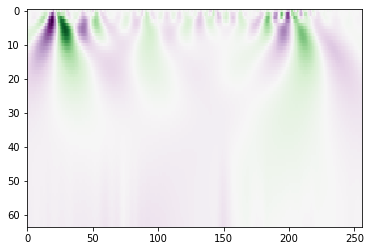

In [98]:
temp = 650
plt.imshow(cwtmatr[temp,:,:,0], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr[temp,:,:,0]).max(), 
           vmin=-abs(cwtmatr[temp,:,:,0]).max())
print(y[temp])

In [94]:
print('max: %f'%(cwtmatr.max()))

max: 10774.616683


In [93]:
sys.getsizeof(cwtmatr)

4601151632

In [3]:
path = './processed data/data_set_after_window.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [4]:
feature = dp.generate_feature(x)

In [5]:
ind = (y==2)

In [8]:
ind2 = (y==0)

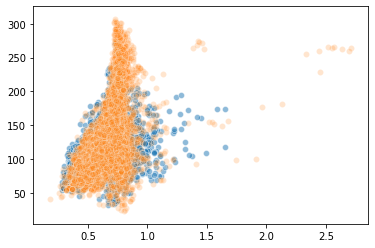

In [45]:
f1 = 8
f2 = 40
sns.scatterplot(feature[ind,f1],feature[ind,f2],alpha=0.5)
sns.scatterplot(feature[ind2,f1],feature[ind2,f2],alpha=0.2)

In [28]:
a = np.array([1,2,3,4])
ak,sig = autoregressive.AR_est_YW(a,3)

In [29]:
a[:3]@ak+sig

4.373102815177478